In [2]:
# !pip install minisom
# !pip install sklearn
# !pip install sklearn-som
# !pip install yellowbrick
# !pip install plotly.express
import warnings
warnings.filterwarnings('ignore')

In [3]:
from collections import defaultdict
import numpy as np
from matplotlib import pyplot as plt
# from minisom import MiniSom
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import load_digits
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.manifold import TSNE
from tqdm import tqdm
from sklearn_som.som import SOM
import seaborn as sns
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
import plotly.express as px
import seaborn as sns
from sklearn.datasets import make_blobs
from yellowbrick.cluster import InterclusterDistance
from sklearn.datasets import make_blobs, make_circles, make_s_curve

In [4]:
import numpy as np
import pandas as pd
import re

#============= Read CSV and apply data preperation =============#
df = pd.read_csv("Assignment3_dataset.csv")

In [3]:
    
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
df['Age'] = df['Age'].replace(0, df['Age'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['Pregnancies'] = df['Pregnancies'].replace(0, df['Pregnancies'].mean())



In [5]:
d=df.to_numpy()
data=df.iloc[:,:-1]
target=df['Outcome']
X = np.array(data)
Y= np.array(target)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(random_state=0)
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
evaluation_LR = accuracy_score(y_test, predictions)

In [8]:
print(evaluation_LR)
print(len(predictions))
print(len(y_test))

0.765625
192
192


In [9]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.765625


In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
 
knn.fit(x_train, y_train)
 
# Predict on dataset which model has not seen before

KNN_pred=knn.predict(x_test)
evaluation_KNN = accuracy_score(y_test, KNN_pred)
evaluation_KNN

0.75

TNSE for Trainig 

In [11]:
def draw_Tsne(x,y):
  
  data=x                               
  data_labels=y                        
  tsne = TSNE(n_components=2, random_state=0)
  X_2d = tsne.fit_transform(data)  

  #plot tsne for x_test and x_train
  classes=unique_labels(data_labels)         
  target_ids = range(len(classes))
  plt.figure(figsize=(6, 5))
  colors = 'r', 'g'
  for i, c, label in zip(target_ids, colors, classes):
    plt.scatter(X_2d[data_labels == i,1], X_2d[data_labels == i, 0], c=c, label=label)
    
  plt.legend()
  plt.show()

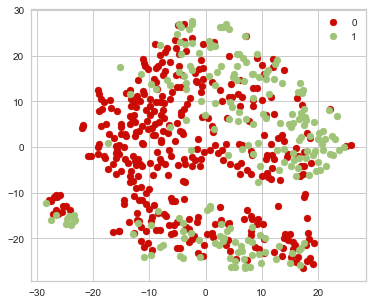

In [12]:
draw_Tsne(x_train,y_train)

TNSE for Testing

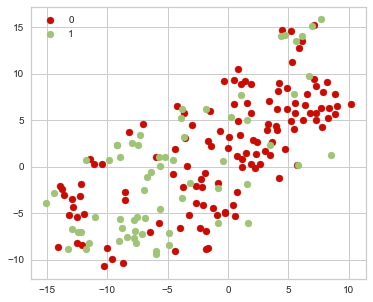

In [13]:
draw_Tsne(x_test,y_test)

For n_clusters = 2 The average silhouette_score is : 0.26114611150604655
For n_clusters = 3 The average silhouette_score is : 0.18151103414798983
For n_clusters = 4 The average silhouette_score is : 0.20808119301398584
For n_clusters = 5 The average silhouette_score is : 0.20075741354829582


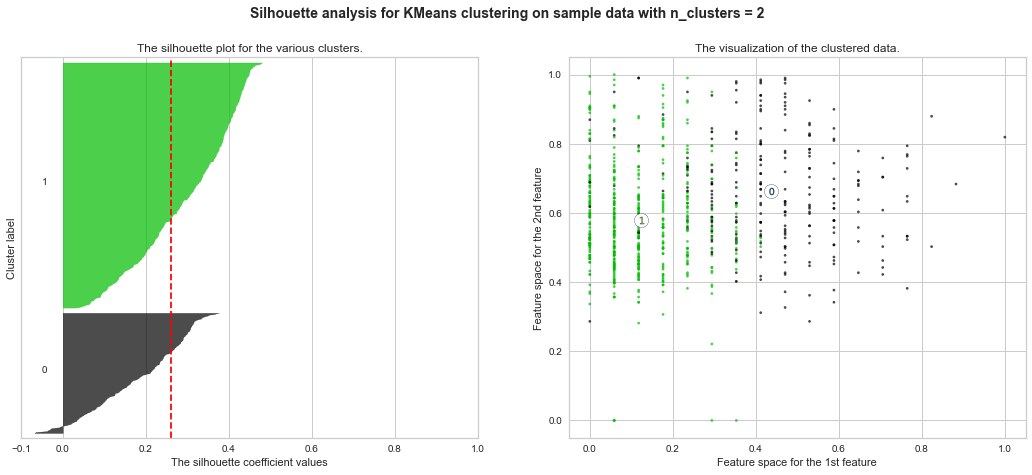

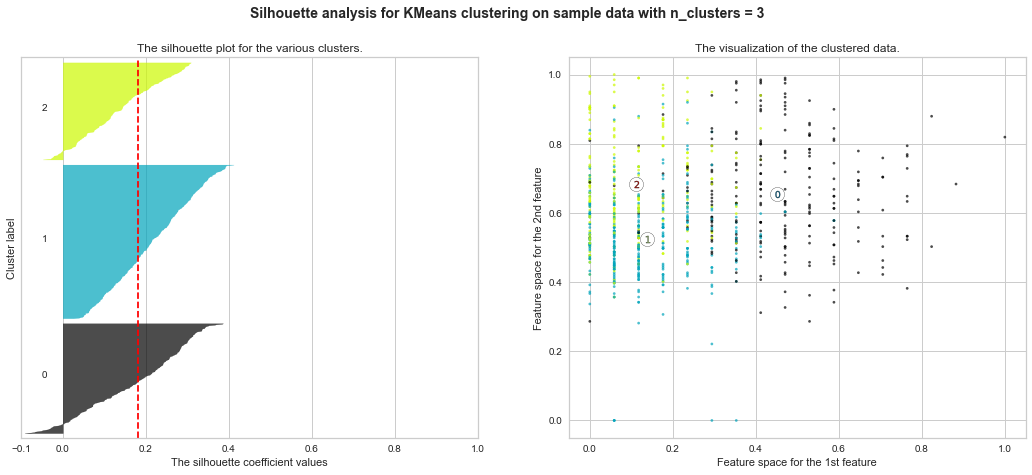

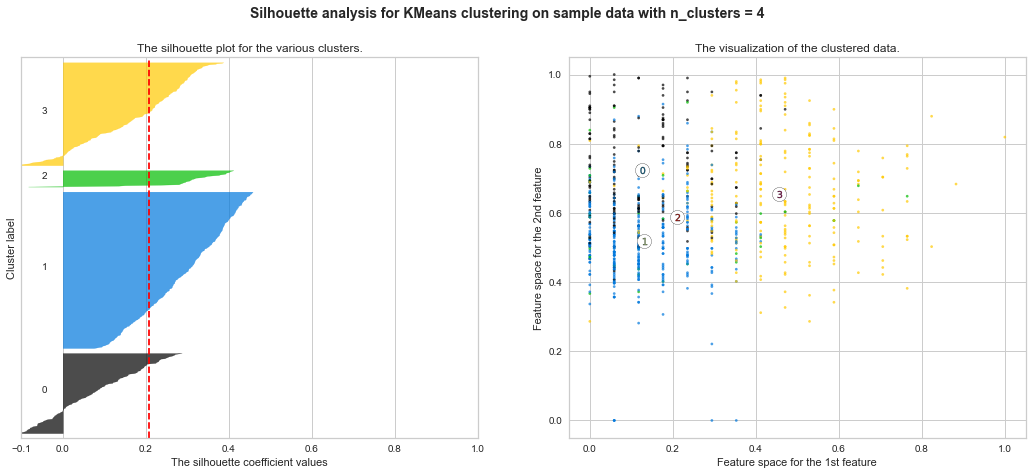

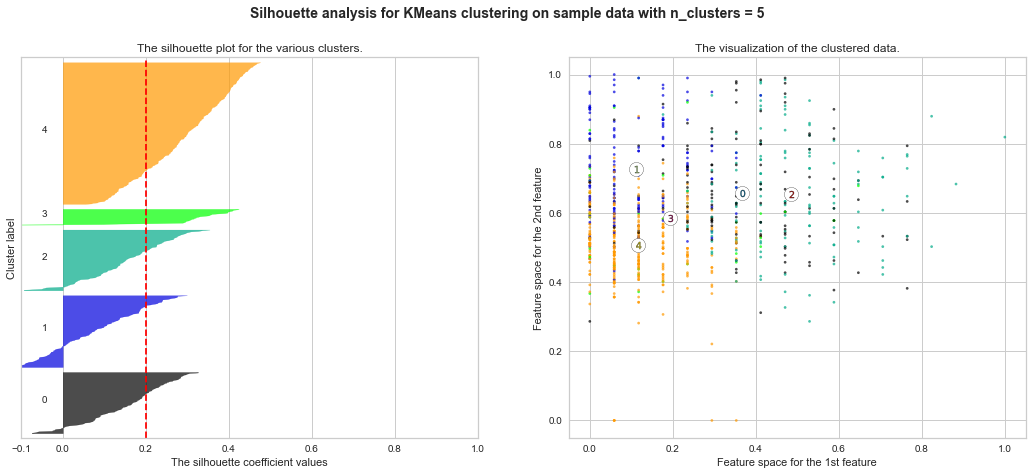

In [14]:


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

<AxesSubplot:>

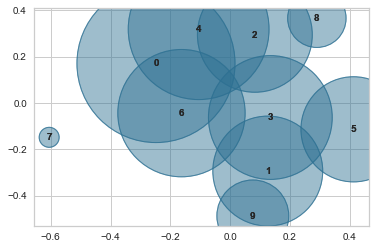

In [15]:
model = KMeans(10,random_state=0)
visualizer = InterclusterDistance(model,random_state=0)

visualizer.fit(X)        
visualizer.draw()

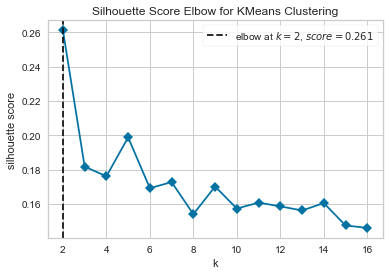

In [16]:
from yellowbrick.cluster.elbow import kelbow_visualizer
model = kelbow_visualizer(KMeans(random_state=0), X, k=(2,17),metric='silhouette',timings=False)  

pass

In [76]:
#after supervising
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=8)),  #trying changing this to 50 or 90 and observe the difference in accuracy
    ("log_reg", LogisticRegression(solver='lbfgs', max_iter=10000,random_state=0))
])
pipeline.fit(x_train, y_train)
print(pipeline.score(x_test, y_test))

0.703125


In [77]:

# from sklearn.decomposition import PCA
# acc_dict = {}
# for n_comp in range(, 8):
#   LR = LogisticRegression()
#   pca = PCA(n_components=n_comp)
#   X_pca = pca.fit_transform(X)
#   X_train_pca, X_test_pca, y_train_pca, y_test_pca =train_test_split(X_pca, Y, test_size=0.25, random_state=0)
#   LR.fit(X_train_pca, y_train)
#   y_predict_pca = LR.predict(X_test_pca)
#   acc_pca = accuracy_score(y_test, y_predict_pca)
#   acc_dict[n_comp] = acc_pca

# plt.plot(*zip(*sorted(acc_dict.items())))
# Title = "PCA Method to reduce feature dimension"
# plt.title(Title, fontsize=16)
# plt.xlabel("Number of Components", fontsize=16)
# plt.ylabel("Accuracy (%)", fontsize=16)

# print("Maximum accuracy:", max(acc_dict.values()))
# print("Best number of n_components:", max(acc_dict, key=acc_dict.get))

In [87]:
def fun(model):

  from sklearn.decomposition import PCA
  acc_dict = {}
  for n_comp in range(1, 8):

    
    pca = PCA(n_components=n_comp)
    X_pca = pca.fit_transform(X)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca =train_test_split(X_pca, Y, test_size=0.25, random_state=0)
    model.fit(X_train_pca, y_train)
    y_predict_pca = model.predict(X_test_pca)
    acc_pca = accuracy_score(y_test, y_predict_pca)
    acc_dict[n_comp] = acc_pca

  plt.plot(*zip(*sorted(acc_dict.items())))
  Title = "PCA Method to reduce feature dimension"
  plt.title(Title, fontsize=16)
  plt.xlabel("Number of Components", fontsize=16)
  plt.ylabel("Accuracy (%)", fontsize=16)

  print("Maximum accuracy:", max(acc_dict.values()))
  print("Best number of n_components:", max(acc_dict, key=acc_dict.get))
  return X_train_pca, X_test_pca, y_train_pca, y_test_pca


TypeError: 'numpy.float64' object is not callable

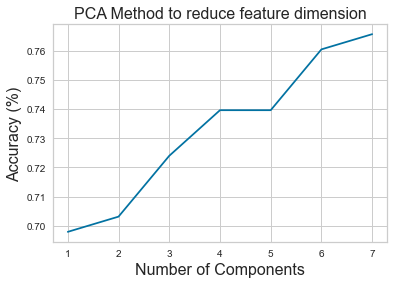

In [88]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca=fun(LogisticRegression(random_state=0))

Maximum accuracy: 0.7604166666666666
Best number of n_components: 6


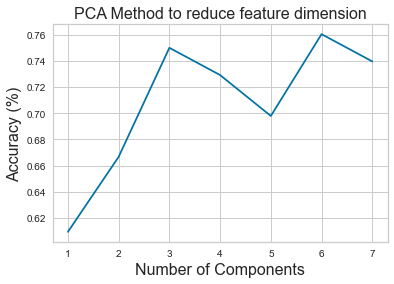

In [22]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca=fun( KNeighborsClassifier())

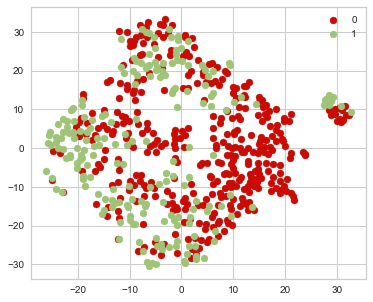

In [23]:
draw_Tsne(X_train_pca,y_train_pca)

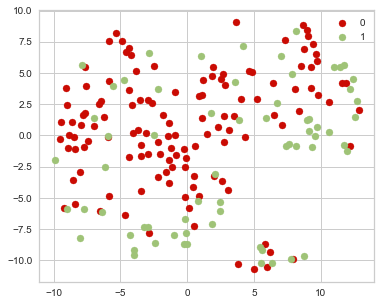

In [24]:
draw_Tsne(X_test_pca,y_test_pca)

In [25]:
from sklearn.decomposition import PCA
def pca(n):

  pca = PCA(n_components=n)
  X_pca = pca.fit_transform(X)
  X_train_pca, X_test_pca, y_train_pca, y_test_pca =train_test_split(X_pca, Y, test_size=0.25, random_state=0)
  model.fit(X_train_pca, y_train)
  y_predict_pca = model.predict(X_test_pca)
  acc_pca = accuracy_score(y_test, y_predict_pca)
  return X_train_pca, X_test_pca, y_train_pca, y_test_pca

In [89]:
def LogReg(x_train_new, x_test_new, y_train_new, y_test_new ):
  
  LR=LogisticRegression(random_state=0)
  
  LR.fit(x_train_new, y_train_new)
  
  predictions = LR.predict(x_test_new)
  # print(len(predictions))
  # print(len(y_test_new))
  acc_LR = accuracy_score(y_test_new, predictions)
  return acc_LR




In [90]:
def LR_with_pca(X_train_pca, X_test_pca, y_train_pca, y_test_pca):
  
  LR=LogisticRegression(random_state=0)
  LR.fit(X_train_pca, y_train_pca)
  predictions = LR.predict(X_test_pca)
  acc_LR_pca = accuracy_score(y_test_pca, predictions)
  return acc_LR_pca

In [91]:
from sklearn.neighbors import KNeighborsClassifier
def KNN(x_train_new, x_test_new, y_train_new, y_test_new):
  
  kNN = KNeighborsClassifier(n_neighbors=2)
 
  kNN.fit(x_train_new, y_train_new)
 
  # Predict on dataset which model has not seen before

  KNN_pred=kNN.predict(x_test_new)
  acc_knn= accuracy_score(y_test_new, KNN_pred)



  
  
  return acc_knn


In [92]:
def KNN_with_pca(X_train_pca, X_test_pca, y_train_pca, y_test_pca):
  
  knn = KNeighborsClassifier()
 
  knn.fit(X_train_pca, y_train_pca)
 
  # Predict on dataset which model has not seen before

  KNN_pred=knn.predict(X_test_pca)
  acc_knn_pca= accuracy_score(y_test_pca, KNN_pred)
  return acc_knn_pca

In [93]:
new_X=X[:,0:2]
new_X
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(new_X, Y, test_size=0.25, random_state=0)
print(len(x_train_new),len( x_test_new),len( y_train_new),len( y_test_new ))

576 192 576 192


In [69]:
accList=[]
for n in range(2,8):
  new_X=X[:,0:n]
  x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(new_X, Y, test_size=0.25, random_state=0)
  acc_LR=LogReg(x_train_new, x_test_new, y_train_new, y_test_new )
  X_train_pca, X_test_pca, y_train_pca, y_test_pca=pca(n)
  acc_LR_pca=LR_with_pca(X_train_pca, X_test_pca, y_train_pca, y_test_pca)
  acc_knn=KNN(x_train_new, x_test_new, y_train_new, y_test_new)
  acc_KNN_pca=KNN_with_pca(X_train_pca, X_test_pca, y_train_pca, y_test_pca)
  accList.append(acc_LR)
  accList.append(acc_LR_pca)
  accList.append(acc_knn)
  accList.append(acc_KNN_pca)

In [32]:
accList
nList=[2,3,4,5,6,7,8]

<function matplotlib.pyplot.show(close=None, block=None)>

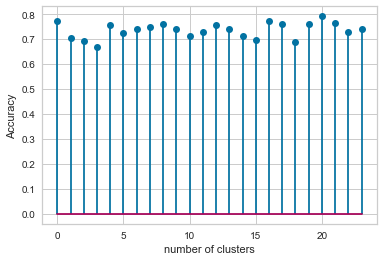

In [33]:
#plot number of neurons/number of clusters vs accuracy score
#plt.bar(accList, nList, color ='maroon')
plt.stem(accList)
plt.xlabel("number of clusters")
plt.ylabel("Accuracy")
plt.show

# 4. Use the following Feature Selection methods (one for each method). Find the best
number of features based on both, the LR and K-NN classifiers’ test accuracies.

In [34]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.411765,0.623116,0.573770,0.333333,0.254137,0.380030,0.035440,0.266667,0
1,0.294118,0.542714,0.590164,0.434343,0.088652,0.538003,0.078992,0.200000,0
2,0.058824,0.437186,0.491803,0.373737,0.088652,0.554396,0.184031,0.016667,0
3,0.058824,0.723618,0.672131,0.464646,0.212766,0.687034,0.109735,0.416667,1
4,0.058824,0.557789,0.508197,0.131313,0.215130,0.357675,0.025619,0.033333,0
...,...,...,...,...,...,...,...,...,...
763,0.000000,0.587940,0.655738,0.313131,0.062648,0.673621,0.004697,0.050000,0
764,0.705882,0.422111,0.590164,0.313131,0.000000,0.442623,0.093510,0.416667,1
765,0.352941,0.618090,0.590164,0.454545,0.271868,0.500745,0.279675,0.216667,0
766,0.058824,0.984925,0.622951,0.363636,0.294326,0.543964,0.340307,0.133333,1


In [35]:
df.var()

Pregnancies                 0.039287
Glucose                     0.025814
BloodPressure               0.025171
SkinThickness               0.025964
Insulin                     0.018556
BMI                         0.013806
DiabetesPedigreeFunction    0.020014
Age                         0.038418
Outcome                     0.227483
dtype: float64

## (a) Filter Methods with Information gain and ANOVA

In [70]:
def KNN_model(x_train_new, x_test_new, y_train_new, y_test_new):
  kNN = KNeighborsClassifier()
  kNN.fit(x_train_new, y_train_new)
  # Predict on dataset which model has not seen before
  KNN_pred=kNN.predict(x_test_new)
  acc_knn= accuracy_score(y_test_new, KNN_pred)
  return acc_knn


In [44]:
from sklearn.feature_selection import SelectKBest, f_classif,mutual_info_classif
def feature_selection(model,X_teain,y_train, feature_selection_method = f_classif, range = range(1,len(df.columns)-1)):
  accuracies=[]
  n_features = range
  best_accuracy =0 
  data =()
  
  for i in n_features:
    feature_selection = SelectKBest(feature_selection_method, k= i)
    x_new = feature_selection.fit_transform(X_teain,y_train)
    x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, Y, test_size=0.25, random_state=0)
    # acc_LR=LogReg(x_train_new, x_test_new, y_train_new, y_test_new )
    acc= model(x_train_new, x_test_new, y_train_new, y_test_new)
    # LR_accuracies.append(acc_LR)
    accuracies.append(acc)
    if acc> best_accuracy:
      best_accuracy = acc
      best_i = i
      data = (x_train_new, x_test_new, y_train_new, y_test_new)
      best_f_model = feature_selection

  return accuracies,best_accuracy,best_i,data,best_f_model

### First KNN

In [94]:
n_features = range(2,len(df.columns)-1)
KNN_ANOVA_accuracies,KNN_max_accuracy_anova,KNN_ANOVA_best_i ,KNN_ANOVA_transformed_data, KNN_ANOVA_feature_selection_model= feature_selection(KNN_model,X,Y, feature_selection_method= f_classif, range=n_features )
KNN_INFO_GAIN_accuracies ,KNN_max_accuracy_info, KNN_INFO_GAIN_best_i,KNN_INFO_GAIN_transformed_data, KNN_INFO_GAIN_feature_selection_model= feature_selection(KNN_model,X,Y, feature_selection_method= mutual_info_classif, range=n_features)

KNN_ANOVA_accuracies:  [0.7395833333333334, 0.7291666666666666, 0.6979166666666666, 0.734375, 0.7395833333333334, 0.7447916666666666]
KNN_INFO_GAIN_accuracies:  [0.7395833333333334, 0.7239583333333334, 0.7291666666666666, 0.75, 0.7395833333333334, 0.7447916666666666]
maximum score with anova = 0.7447916666666666 , and the number of features = 7
maximum score with Information Gain = 0.75 , and the number of features = 5
---------------------------------------------------------------------------------------
the best Method is Information Gain with accuracy = 0.75 
the number of features = 5


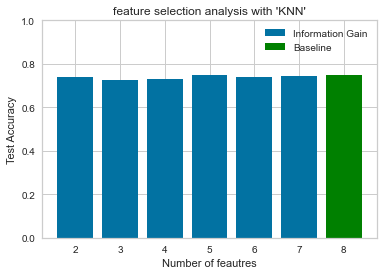

In [95]:

print("KNN_ANOVA_accuracies: ",KNN_ANOVA_accuracies)
print("KNN_INFO_GAIN_accuracies: ",KNN_INFO_GAIN_accuracies)

max_accuracy_anova = KNN_max_accuracy_anova
max_accuracy_info = KNN_max_accuracy_info

print(f'maximum score with anova = {max_accuracy_anova} , and the number of features = {KNN_ANOVA_best_i}')
print(f'maximum score with Information Gain = {max_accuracy_info} , and the number of features = {KNN_INFO_GAIN_best_i}')
print("---------------------------------------------------------------------------------------")
max = max_accuracy_info
if max< max_accuracy_anova or (max== max_accuracy_anova and KNN_ANOVA_best_i <= KNN_INFO_GAIN_best_i):
    max= max_accuracy_anova
    print (f"the best Method is ANOVA with accuracy = {max} \nthe number of features = {KNN_ANOVA_best_i}")
    plt.bar(n_features,KNN_ANOVA_accuracies,label="ANOVA")
    plt.bar([8],[evaluation_KNN],label="Baseline",color ="green")
    # plt.bar(n_features,KNN_INFO_GAIN_accuracies,label="Iformation Gain")
    plt.title("feature selection analysis with 'KNN'")
    plt.xlabel("Number of feautres")
    plt.ylabel("Test Accuracy")
    plt.legend()
    plt.ylim(0,1)
    plt.show()
else:
    print (f"the best Method is Information Gain with accuracy = {max} \nthe number of features = {KNN_INFO_GAIN_best_i}")
    plt.bar(n_features,KNN_INFO_GAIN_accuracies,label="Information Gain")
    plt.bar([8],[evaluation_KNN],label="Baseline",color ="green")
    plt.title("feature selection analysis with 'KNN'")
    plt.xlabel("Number of feautres")
    plt.ylabel("Test Accuracy")
    plt.legend()
    plt.ylim(0,1)
    plt.show()


### Secondely with LR

In [96]:
n_features = range(2,len(df.columns)-1)
LR_ANOVA_accuracies, LR_max_accuracy_anova,LR_ANOVA_best_i ,LR_ANOVA_transformed_data, LR_ANOVA_feature_selection_model = feature_selection(LogReg,X,Y, feature_selection_method= f_classif, range=n_features )
LR_INFO_GAIN_accuracies, LR_max_accuracy_info,LR_INFO_GAIN_best_i ,LR_INFO_GAIN_transformed_data, LR_INFO_GAIN_feature_selection_model = feature_selection(LogReg,X,Y, feature_selection_method= mutual_info_classif, range=n_features)

LR_ANOVA_accuracies:  [0.7708333333333334, 0.7864583333333334, 0.78125, 0.78125, 0.78125, 0.7604166666666666]
LR_INFO_GAIN_accuracies:  [0.7708333333333334, 0.7864583333333334, 0.78125, 0.7864583333333334, 0.78125, 0.78125]
maximum score with anova = 0.7864583333333334 , and the number of features = 3
maximum score with information gain = 0.7864583333333334 , and the number of features = 3
---------------------------------------------------------------------------------------
the best Method is Information Gain with accuracy = 0.7864583333333334 
the number of features = 3


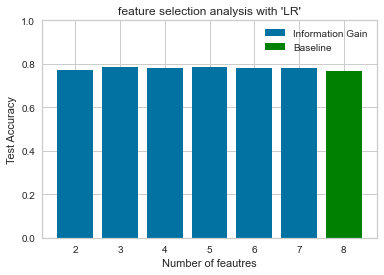

In [98]:
print("LR_ANOVA_accuracies: ",LR_ANOVA_accuracies)
print("LR_INFO_GAIN_accuracies: ",LR_INFO_GAIN_accuracies)
max_accuracy_anova = LR_max_accuracy_anova
max_accuracy_info = LR_max_accuracy_info
print(f'maximum score with anova = {max_accuracy_anova} , and the number of features = {LR_ANOVA_best_i}')
print(f'maximum score with information gain = {max_accuracy_info} , and the number of features = {LR_INFO_GAIN_best_i}')
print("---------------------------------------------------------------------------------------")

max = max_accuracy_info

if max< max_accuracy_anova or (max== max_accuracy_anova and LR_ANOVA_best_i < LR_INFO_GAIN_best_i):
    max= max_accuracy_anova
    print (f"the best Method is ANOVA with accuracy = {max} \nthe number of features = {LR_ANOVA_best_i}")
    plt.bar(n_features,LR_ANOVA_accuracies,label="ANOVA")
    plt.bar([8],[evaluation_LR],label="Baseline",color ="green")
    plt.title("feature selection analysis with 'LR'")
    plt.xlabel("Number of feautres")
    plt.ylabel("Test Accuracy")
    plt.legend()
    plt.ylim(0,1)
    plt.show()

else:
    print (f"the best Method is Information Gain with accuracy = {max} \nthe number of features = {LR_INFO_GAIN_best_i}")
    plt.bar(n_features,LR_INFO_GAIN_accuracies,label="Information Gain")
    plt.bar([8],[evaluation_LR],label="Baseline",color ="green")
    plt.title("feature selection analysis with 'LR'")
    plt.xlabel("Number of feautres")
    plt.ylabel("Test Accuracy")
    plt.legend()
    plt.ylim(0,1)
    plt.show()


## (b) Wrapper Methods (Forward Feature Elimination, Recursive Feature Elimination).

In [101]:
# from sklearn.feature_selection import RFE
from sklearn.feature_selection import SequentialFeatureSelector
def fs_wrapper_method(model,testModel,X_teain,y_train, direction = "forward", range = range(1,len(df.columns)-1)):
  accuracies=[]
  n_features = range
  best_accuracy =0 
  data =()
  for i in n_features:
    feature_selection = SequentialFeatureSelector(model, n_features_to_select=i,direction=direction)
    x_new = feature_selection.fit_transform(X_teain,y_train)
    x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, Y, test_size=0.25, random_state=0)
    # acc = feature_selection.score(x_test_new,y_test_new)
    acc= testModel(x_train_new, x_test_new, y_train_new, y_test_new)
    accuracies.append(acc)
    if acc> best_accuracy:
      best_accuracy = acc
      best_i = i
      data = (x_train_new, x_test_new, y_train_new, y_test_new)
      best_f_model = feature_selection

  return accuracies,best_accuracy,best_i,data,best_f_model

### First KNN

In [106]:
n_features = range(2,len(df.columns)-1)
KNN_back_accuracies, KNN_max_accuracy_back,KNN_back_best_i ,KNN_back_transformed_data, KNN_back_wrapper_model= fs_wrapper_method(KNeighborsClassifier(), KNN_model,X,Y, direction = "backward", range=n_features )
KNN_forward_accuracies,KNN_max_accuracy_forward,KNN_forward_best_i ,KNN_forward_transformed_data, KNN_forward_wrapper_model = fs_wrapper_method(KNeighborsClassifier(), KNN_model,X,Y, direction = 'forward', range=n_features)

KNN_back_accuracies:  [0.7395833333333334, 0.7239583333333334, 0.75, 0.7552083333333334, 0.7395833333333334, 0.78125]
KNN_forward_accuracies:  [0.6979166666666666, 0.6979166666666666, 0.7135416666666666, 0.7083333333333334, 0.7135416666666666, 0.78125]
maximum score with backword selection = 0.78125 , and the number of features = 7
maximum score with forward selection = 0.78125 , and the number of features = 7
---------------------------------------------------------------------------------------
the best Method is backword selection with accuracy = 0.78125 
the number of features = 7


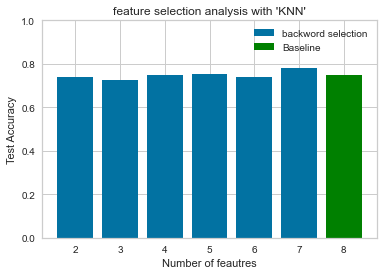

In [107]:

print("KNN_back_accuracies: ",KNN_back_accuracies)
print("KNN_forward_accuracies: ",KNN_forward_accuracies)

max_accuracy_back = KNN_max_accuracy_back
max_accuracy_forward = KNN_max_accuracy_forward

print(f'maximum score with backword selection = {max_accuracy_back} , and the number of features = {KNN_back_best_i}')
print(f'maximum score with forward selection = {max_accuracy_forward} , and the number of features = {KNN_forward_best_i}')
print("---------------------------------------------------------------------------------------")
max = max_accuracy_forward
if max< max_accuracy_back or (max== max_accuracy_back and KNN_back_best_i <= KNN_forward_best_i):
    max= max_accuracy_back
    print (f"the best Method is backword selection with accuracy = {max} \nthe number of features = {KNN_back_best_i}")
    plt.bar(n_features,KNN_back_accuracies,label="backword selection")
    plt.bar([8],[evaluation_KNN],label="Baseline",color ="green")
    # plt.bar(n_features,KNN_INFO_GAIN_accuracies,label="Iformation Gain")
    plt.title("feature selection analysis with 'KNN'")
    plt.xlabel("Number of feautres")
    plt.ylabel("Test Accuracy")
    plt.legend()
    plt.ylim(0,1)
    plt.show()
else:
    print (f"the best Method is forward selection with accuracy = {max} \nthe number of features = {KNN_forward_best_i}")
    plt.bar(n_features,KNN_forward_accuracies,label="forward selection")
    plt.bar([8],[evaluation_KNN],label="Baseline",color ="green")
    plt.title("feature selection analysis with 'KNN'")
    plt.xlabel("Number of feautres")
    plt.ylabel("Test Accuracy")
    plt.legend()
    plt.ylim(0,1)
    plt.show()


### Secondly with LR

In [111]:
n_features = range(2,len(df.columns)-1)
LR_back_accuracies, LR_max_accuracy_back,LR_back_best_i ,LR_back_transformed_data, LR_back_wrapper_model= fs_wrapper_method(LogisticRegression(random_state=0),LogReg,X,Y, direction = "backward", range=n_features )
LR_forward_accuracies,LR_max_accuracy_forward,LR_forward_best_i ,LR_forward_transformed_data, LR_forward_wrapper_model= fs_wrapper_method(LogisticRegression(random_state=0),LogReg,X,Y, direction = "forward", range=n_features)

LR_back_accuracies:  [0.7708333333333334, 0.7760416666666666, 0.8020833333333334, 0.8072916666666666, 0.78125, 0.765625]
LR_forward_accuracies:  [0.7708333333333334, 0.7760416666666666, 0.8020833333333334, 0.8072916666666666, 0.8072916666666666, 0.78125]
maximum score with backword selection = 0.8072916666666666 , and the number of features = 5
maximum score with forward selection = 0.8072916666666666 , and the number of features = 5
---------------------------------------------------------------------------------------
the best Method is backword selection with accuracy = 0.8072916666666666 
the number of features = 5


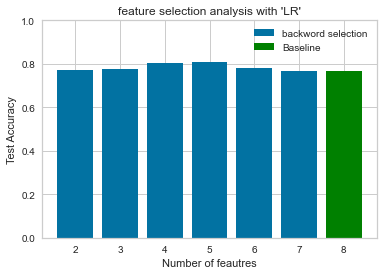

In [112]:

print("LR_back_accuracies: ",LR_back_accuracies)
print("LR_forward_accuracies: ",LR_forward_accuracies)

max_accuracy_back = LR_max_accuracy_back
max_accuracy_forward = LR_max_accuracy_forward

print(f'maximum score with backword selection = {max_accuracy_back} , and the number of features = {LR_back_best_i}')
print(f'maximum score with forward selection = {max_accuracy_forward} , and the number of features = {LR_forward_best_i}')
print("---------------------------------------------------------------------------------------")
max = max_accuracy_forward
if max< max_accuracy_back or (max== max_accuracy_back and LR_back_best_i <= LR_forward_best_i):
    max= max_accuracy_back
    print (f"the best Method is backword selection with accuracy = {max} \nthe number of features = {LR_back_best_i}")
    plt.bar(n_features,LR_back_accuracies,label="backword selection")
    plt.bar([8],[evaluation_LR],label="Baseline",color ="green")
    plt.title("feature selection analysis with 'LR'")
    plt.xlabel("Number of feautres")
    plt.ylabel("Test Accuracy")
    plt.legend()
    plt.ylim(0,1)
    plt.show()
else:
    print (f"the best Method is forward selection with accuracy = {max} \nthe number of features = {LR_forward_best_i}")
    plt.bar(n_features,LR_forward_accuracies,label="forward selection")
    plt.bar([8],[evaluation_LR],label="Baseline",color ="green")
    plt.title("feature selection analysis with 'LR'")
    plt.xlabel("Number of feautres")
    plt.ylabel("Test Accuracy")
    plt.legend()
    plt.ylim(0,1)
    plt.show()


## (c) Provide 2D TSNE plots, one for the training set and one for the test set, using
only the best method (either the filter or wrapper). 

### the best for KNN is the Wrapper Method withg Backward Feature Elimination

the best Method is backword selection with accuracy = 0.78125 
the number of features = 7

training data


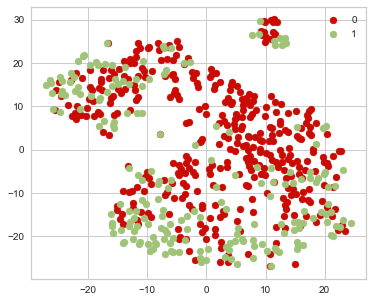

In [113]:
x_train_new, x_test_new, y_train_new, y_test_new = KNN_back_transformed_data
print("training data")
draw_Tsne(x_train_new,y_train_new)

test data


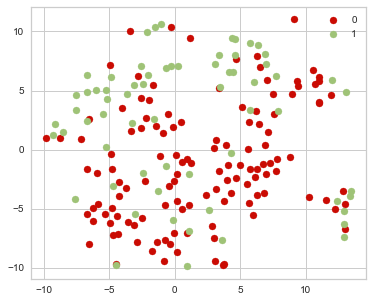

In [114]:
print("test data")
draw_Tsne(x_test_new,y_test_new)

### the best for LR is the Wrapper Method withg Backward Feature Elimination

the best Method is backword selection with accuracy = 0.8072916666666666 
the number of features = 5


training data


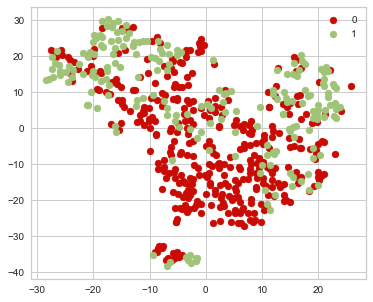

In [115]:
x_train_new, x_test_new, y_train_new, y_test_new = LR_back_transformed_data
print("training data")
draw_Tsne(x_train_new,y_train_new)

test data


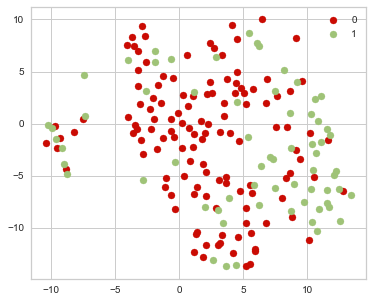

In [116]:
print("test data")
draw_Tsne(x_test_new,y_test_new)

# 5. Choose the best number of cluster for k-means clustering algorithm on the processed
data, using the best features from Q3 or best number of dimensionality Q4.

## (a) Plot the silhouette score vs the number of clusters

### FROM Q4 the best number of dimentions are 7 with KNN

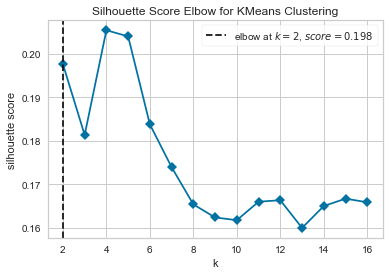

In [133]:
x_train_new, x_test_new, y_train_new, y_test_new = KNN_back_transformed_data
X_train = np.concatenate((x_train_new,x_test_new),axis=0)
y_train = np.concatenate((y_train_new, y_test_new),axis=0)
model = kelbow_visualizer(KMeans(random_state=0),X_train, k=(2,17),metric='silhouette',timings=False)  

pass

with 7 features the best K = 4 that gives the highest silouette score

### FROM Q4 the best number of dimentions are 5 with LR

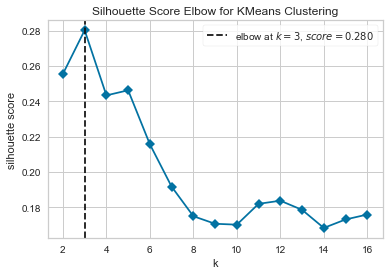

In [130]:
from yellowbrick.cluster.elbow import kelbow_visualizer
x_train_new, x_test_new, y_train_new, y_test_new = LR_back_transformed_data
X_train = np.concatenate((x_train_new,x_test_new),axis=0)
y_train = np.concatenate((y_train_new, y_test_new),axis=0)
model = kelbow_visualizer(KMeans(random_state=0),X_train, k=(2,17),metric='silhouette',timings=False)  

pass

with 5 features the best K = 3 that gives the highest silouette score